## EDA _PI03

Dado que el objetivo del PI 03 es realizar un análisis completo que permita reconocer el comportamiento del sector telecomunicaciones en Argentina y que deben definirse 3 KPI, además del propuesto: "Evaluar el aumento o disminución de la variación porcentual trimestral del servicio de internet, cada 100 hogares por provincia".

Se analizan las siguientes tablas propuestas como material de base y se seleccionan 9 según se explica_ ver debajo el EDA. 

Las tablas 13, 14 y 15 se sumarán únicamente si se dispone del tiempo, ya que se requiere de una limpieza y homogenización de los datos para poder utilizarlas. Además, las mismas implican un análisis más detallado, si se lo compara con el análisis por provincia.

_________________________________________________________________________________


## Analisis tabla a tabla

tabla 1=Internet_Penetracion 

- Se selecciona porque está vinculada al KPI propuesto

tabla 2=Penetración por hogares nacional de Internet fijo

- No se elije para la tabla de tendencias, pero será construida a partir de la información de la tabla 1

tabla 3=Total nacional de accesos a Internet fijo por banda ancha y banda angosta (BAF)

- No se selecciona porque es más abarcativa la tabla 04 

tabla 4=Accesos a banda ancha y banda angosta por provincia (BAF_prov)

- Se selecciona porque contiene información de bandas discriminado por provincia

tabla 5=Serie trimestral de accesos a Internet fijo por tecnología

- No se selecciona. Se realizará el mismo grafico para analisis de tendencias - pero con los datos de la tabla 6

tabla 6=Acceso a Internet fijo por tecnología y provincia

- Se selecciona porque contiene información de tecnologías discriminado por provincia. 

tabla 7=Velocidad Media de bajada de Internet fijo

- No se selecciona. Se realizará el mismo grafico para analisis de tendencias - pero con los datos de la tabla 8

tabla 8=Velocidad media de bajada de Internet fijo por provincia

- Se selecciona porque contiene información de tecnología discriminado por provincia

tabla 9=Distribución de los accesos totales nacionales a Internet fijo por velocidad

- No se selecciona. Se realizará el mismo grafico para analisis de tendencias - pero con los datos de la tabla 10

tabla 10=Acceso a Internet Fijo por rangos de velocidad de bajada y provincia

- Se selecciona porque contiene información de velocidad discriminado por provincia 

tabla 11=Accesos a Internet fijo por velocidad bajada y provincia

- es equivalente a la 10

tabla 12= Ingresos trimestrales por la prestación del servicio de Internet fijo

*** en base a los gráficos, se analizará la provincia de oportunidad a definir y luego entraremos en localidad ***


tabla 13=Accesos a Internet fijo por velocidad de bajada y localidad

tabla 14=Accesos a Internet fijo por tecnología y localidad

tabla 15=Listado de localidades con conectividad a internet

- esta tabla podría servir como tabla auxiliar

tabla 16= Conectividad al servicio de Internet

- se analizó el mapa

_________________________________________________________________________________
Como estratégia se decidió realizar el analisis de EDA: 

 1- Primero general usando una formula

 2- Luego en detalle con graficos utilizando otra

 3- Se migrarán a Power BI unicamente las tablas seleccionadas

 4- Solo se limpiarán las columnas de las tablas relevantes que serán utilizadas
 

Importo las librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt2
from scipy import stats
from scipy.stats import poisson

Creo una funcion para decidir que tablas siven: 
- abro el csv como un dataframe de Pandas
- solicito una muestra para analizar si hay errores de tipeo y ver tipos de datos.
- solicito ver tipo de datos
- pido información para ver si hay o no nulos

In [3]:
url_1='Datasets\\Internet_Penetracion_df1.csv'
url_2='Datasets\\Internet_Penetracion_df2.csv'
url_3='Datasets\\Internet_BAF_df3.csv'
url_4='Datasets\\Internet_BAF_prov_df4.csv'
url_5='Datasets\\Internet_Accesos-por-tecnologia_df5.csv'
url_6='Datasets\\Internet_Accesos-por-tecnologia_df6.csv'
url_7='Datasets\\Internet_Accesos-por-tecnologia_df7.csv'
url_8='Datasets\\Internet_Accesos-por-tecnologia_df8.csv'
url_9='Datasets\\Internet_Accesos-por-velocidad_df9.csv'
url_10='Datasets\\Internet_Accesos-por-velocidad_df10.csv'
url_11='Datasets\\AccesosaInternetfijoporvelocidadbajadayprovincia_df11.csv'
url_12='Datasets\\Internet_Ingresos_df12.csv'
url_13='Datasets\\AccesosaInternetfijoporvelocidaddebajadaylocalidad_df13.csv'
url_14='Datasets\\AccesosaInternetfijoportecnologiaylocalidad_df14.csv'
url_15='Datasets\\Listadodelocalidadesconconectividadainternet_df15.csv'
url_16='Datasets\\ConectividadalserviciodeInternet_df16.csv'

In [4]:
def eda_general(url):

    df=pd.read_csv(url, decimal=',')

    if type(df)!='array':
        return df.head(5), df.dtypes, df.info(), df.describe(),df.sample(5) 

In [5]:
def eda_duplicados(url):

    df=pd.read_csv(url, decimal=',')
    df2=df.drop_duplicates()
    m=df.shape
    n=df2.shape
    o=df.size
    p=df2.size
    if o==p and m==n:
        return 'No hay duplicados'
    else: 
        return 'hay un total de', (o-p), 'datos y un total de registros duplicados de', (m[0]-n[0])

In [6]:
eda_duplicados(url_1)

'No hay duplicados'

In [7]:
eda_general(url_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   Accesos por cada 100 hogares  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


(    Año  Trimestre        Provincia  Accesos por cada 100 hogares
 0  2022          1     Buenos Aires                         76.08
 1  2022          1  Capital Federal                        111.80
 2  2022          1        Catamarca                         58.21
 3  2022          1            Chaco                         44.06
 4  2022          1           Chubut                         88.05,
 Año                               int64
 Trimestre                         int64
 Provincia                        object
 Accesos por cada 100 hogares    float64
 dtype: object,
 None,
                Año   Trimestre  Accesos por cada 100 hogares
 count   792.000000  792.000000                    792.000000
 mean   2017.636364    2.454545                     47.907184
 std       2.386030    1.131306                     22.810661
 min    2014.000000    1.000000                      9.350000
 25%    2016.000000    1.000000                     31.540000
 50%    2018.000000    2.000000       

### Tabla 1
- No hay datos nulos
- No hay duplicados
- El type de las columnas es correcto

-- SE SELECCIONA ---

In [8]:
eda_duplicados(url_2)

'No hay duplicados'

In [9]:
eda_general(url_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           33 non-null     int64  
 1   Trimestre                     33 non-null     int64  
 2   Accesos por cada 100 hogares  33 non-null     float64
 3   Accesos por cada 100 hab      33 non-null     float64
 4   Periodo                       33 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.4+ KB


(    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
 0  2022          1                         73.88                     23.05   
 1  2021          4                         73.18                     22.81   
 2  2021          3                         70.58                     21.98   
 3  2021          2                         69.24                     21.55   
 4  2021          1                         67.95                     21.13   
 
          Periodo  
 0   Ene-Mar 2022  
 1   Oct-Dic 2021  
 2  Jul-Sept 2021  
 3   Abr-Jun 2021  
 4   Ene-Mar 2021  ,
 Año                               int64
 Trimestre                         int64
 Accesos por cada 100 hogares    float64
 Accesos por cada 100 hab        float64
 Periodo                          object
 dtype: object,
 None,
                Año  Trimestre  Accesos por cada 100 hogares  \
 count    33.000000  33.000000                     33.000000   
 mean   2017.636364   2.454545                 

### Tabla 2
- No hay datos nulos
- No hay duplicados
- El type de las columnas es 

-- NO SE SELECCIONA --

In [32]:
eda_duplicados(url_3)

'No hay duplicados'

In [10]:
eda_general(url_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               33 non-null     int64 
 1   Trimestre         33 non-null     int64 
 2   Banda ancha fija  33 non-null     object
 3   Dial up           33 non-null     object
 4   Total             33 non-null     object
 5   Periodo           33 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.7+ KB


(    Año  Trimestre Banda ancha fija Dial up       Total        Periodo
 0  2022          1       10.611.390  12.619  10.624.009   Ene-Mar 2022
 1  2021          4       10.476.933  12.861  10.489.794   Oct-Dic 2021
 2  2021          3       10.075.184  10.357  10.085.541  Jul-Sept 2021
 3  2021          2        9.852.702  10.382   9.863.084   Abr-Jun 2021
 4  2021          1        9.637.956  10.016   9.647.972   Ene-Mar 2021,
 Año                  int64
 Trimestre            int64
 Banda ancha fija    object
 Dial up             object
 Total               object
 Periodo             object
 dtype: object,
 None,
                Año  Trimestre
 count    33.000000  33.000000
 mean   2017.636364   2.454545
 std       2.421495   1.148121
 min    2014.000000   1.000000
 25%    2016.000000   1.000000
 50%    2018.000000   2.000000
 75%    2020.000000   3.000000
 max    2022.000000   4.000000,
      Año  Trimestre Banda ancha fija Dial up      Total        Periodo
 15  2018          2    

### Tabla 3
- No hay datos nulos
- No hay duplicados
- El type de las columnas NO es correcto varias de ellas

-- NO SE SELECCIONA --

In [33]:
eda_duplicados(url_4)

'No hay duplicados'

In [11]:
eda_general(url_4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               792 non-null    int64 
 1   Trimestre         792 non-null    int64 
 2   Provincia         792 non-null    object
 3   Banda ancha fija  792 non-null    object
 4   Dial up           790 non-null    object
 5   Total             792 non-null    object
dtypes: int64(2), object(4)
memory usage: 37.2+ KB


(    Año  Trimestre        Provincia Banda ancha fija Dial up      Total
 0  2022          1     Buenos Aires        4.549.131   6.293  4.555.424
 1  2022          1  Capital Federal        1.415.378   2.163  1.417.541
 2  2022          1        Catamarca           62.377       1     62.378
 3  2022          1            Chaco          144.114       5    144.119
 4  2022          1           Chubut          170.701     927    171.628,
 Año                  int64
 Trimestre            int64
 Provincia           object
 Banda ancha fija    object
 Dial up             object
 Total               object
 dtype: object,
 None,
                Año   Trimestre
 count   792.000000  792.000000
 mean   2017.636364    2.454545
 std       2.386030    1.131306
 min    2014.000000    1.000000
 25%    2016.000000    1.000000
 50%    2018.000000    2.000000
 75%    2020.000000    3.000000
 max    2022.000000    4.000000,
       Año  Trimestre        Provincia Banda ancha fija Dial up      Total
 696  

### Tabla 4
- No hay datos nulos
- No hay duplicados
- El type de las columnas NO es correcto varias de ellas

-- SE SELECCIONA -- deben corregirse los errores

In [34]:
eda_duplicados(url_5)

'No hay duplicados'

In [12]:
eda_general(url_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           33 non-null     int64 
 1   Trimestre     33 non-null     int64 
 2   ADSL          33 non-null     object
 3   Cablemodem    33 non-null     object
 4   Fibra óptica  33 non-null     object
 5   Wireless      33 non-null     object
 6   Otros         33 non-null     object
 7   Total         33 non-null     object
 8   Periodo       33 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.4+ KB


(    Año  Trimestre       ADSL Cablemodem Fibra óptica Wireless    Otros  \
 0  2022          1  1.533.240  6.073.426    2.219.533  545.814  251.996   
 1  2021          4  1.657.615  5.984.240    2.072.236  523.107  252.596   
 2  2021          3  1.950.631  5.826.257    1.566.048  492.415  250.190   
 3  2021          2  2.018.587  5.641.731    1.472.246  476.968  253.552   
 4  2021          1  2.175.211  5.424.782    1.362.976  434.548  250.455   
 
         Total        Periodo  
 0  10.624.009   Ene-Mar 2022  
 1  10.489.794   Oct-Dic 2021  
 2  10.085.541  Jul-Sept 2021  
 3   9.863.084   Abr-Jun 2021  
 4   9.647.972   Ene-Mar 2021  ,
 Año              int64
 Trimestre        int64
 ADSL            object
 Cablemodem      object
 Fibra óptica    object
 Wireless        object
 Otros           object
 Total           object
 Periodo         object
 dtype: object,
 None,
                Año  Trimestre
 count    33.000000  33.000000
 mean   2017.636364   2.454545
 std       2.4214

### Tabla 5
- No hay datos nulos
- No hay duplicados
- El type de las columnas NO es correcto varias de ellas

-- NO SE SELECCIONA --

In [35]:
eda_duplicados(url_6)

'No hay duplicados'

In [13]:
eda_general(url_6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           793 non-null    object
 1   Trimestre     793 non-null    object
 2   Provincia     792 non-null    object
 3   ADSL          792 non-null    object
 4   Cablemodem    792 non-null    object
 5   Fibra óptica  792 non-null    object
 6   Wireless      792 non-null    object
 7   Otros         792 non-null    object
 8   Total         792 non-null    object
dtypes: object(9)
memory usage: 55.9+ KB


(    Año Trimestre        Provincia     ADSL Cablemodem Fibra óptica Wireless  \
 0  2022         1     Buenos Aires  392.045  2.728.865    1.242.121  125.521   
 1  2022         1  Capital Federal  102.290  1.217.225       62.308    5.784   
 2  2022         1        Catamarca   14.181     15.517       29.118    1.328   
 3  2022         1            Chaco   32.391     64.546       36.662    8.164   
 4  2022         1           Chubut   44.133     66.667        9.184   30.592   
 
     Otros      Total  
 0  66.872  4.555.424  
 1  29.934  1.417.541  
 2   2.234     62.378  
 3   2.356    144.119  
 4  21.052    171.628  ,
 Año             object
 Trimestre       object
 Provincia       object
 ADSL            object
 Cablemodem      object
 Fibra óptica    object
 Wireless        object
 Otros           object
 Total           object
 dtype: object,
 None,
          Año Trimestre     Provincia    ADSL Cablemodem Fibra óptica Wireless  \
 count    793       793           792     792 

### Tabla 6
- No hay datos nulos
- No hay duplicados
- El type de las columnas NO es correcto en ninguna de ellas

-- SE SELECCIONA -- Deben corregirse los errores antes de avanzar

In [36]:
eda_duplicados(url_7)

'No hay duplicados'

In [14]:
eda_general(url_7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           33 non-null     int64 
 1   Trimestre     33 non-null     int64 
 2   ADSL          33 non-null     object
 3   Cablemodem    33 non-null     object
 4   Fibra óptica  33 non-null     object
 5   Wireless      33 non-null     object
 6   Otros         33 non-null     object
 7   Total         33 non-null     object
 8   Periodo       33 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.4+ KB


(    Año  Trimestre       ADSL Cablemodem Fibra óptica Wireless    Otros  \
 0  2022          1  1.533.240  6.073.426    2.219.533  545.814  251.996   
 1  2021          4  1.657.615  5.984.240    2.072.236  523.107  252.596   
 2  2021          3  1.950.631  5.826.257    1.566.048  492.415  250.190   
 3  2021          2  2.018.587  5.641.731    1.472.246  476.968  253.552   
 4  2021          1  2.175.211  5.424.782    1.362.976  434.548  250.455   
 
         Total        Periodo  
 0  10.624.009   Ene-Mar 2022  
 1  10.489.794   Oct-Dic 2021  
 2  10.085.541  Jul-Sept 2021  
 3   9.863.084   Abr-Jun 2021  
 4   9.647.972   Ene-Mar 2021  ,
 Año              int64
 Trimestre        int64
 ADSL            object
 Cablemodem      object
 Fibra óptica    object
 Wireless        object
 Otros           object
 Total           object
 Periodo         object
 dtype: object,
 None,
                Año  Trimestre
 count    33.000000  33.000000
 mean   2017.636364   2.454545
 std       2.4214

### Tabla 7
- No hay datos nulos
- No hay duplicados
- El type de las columnas NO es correcto en varias de ellas

-- NO SE SELECCIONA -- 

In [37]:
eda_duplicados(url_8)

'No hay duplicados'

In [15]:
eda_general(url_8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           793 non-null    object
 1   Trimestre     793 non-null    object
 2   Provincia     792 non-null    object
 3   ADSL          792 non-null    object
 4   Cablemodem    792 non-null    object
 5   Fibra óptica  792 non-null    object
 6   Wireless      792 non-null    object
 7   Otros         792 non-null    object
 8   Total         792 non-null    object
dtypes: object(9)
memory usage: 55.9+ KB


(    Año Trimestre        Provincia     ADSL Cablemodem Fibra óptica Wireless  \
 0  2022         1     Buenos Aires  392.045  2.728.865    1.242.121  125.521   
 1  2022         1  Capital Federal  102.290  1.217.225       62.308    5.784   
 2  2022         1        Catamarca   14.181     15.517       29.118    1.328   
 3  2022         1            Chaco   32.391     64.546       36.662    8.164   
 4  2022         1           Chubut   44.133     66.667        9.184   30.592   
 
     Otros      Total  
 0  66.872  4.555.424  
 1  29.934  1.417.541  
 2   2.234     62.378  
 3   2.356    144.119  
 4  21.052    171.628  ,
 Año             object
 Trimestre       object
 Provincia       object
 ADSL            object
 Cablemodem      object
 Fibra óptica    object
 Wireless        object
 Otros           object
 Total           object
 dtype: object,
 None,
          Año Trimestre     Provincia    ADSL Cablemodem Fibra óptica Wireless  \
 count    793       793           792     792 

### Tabla 8
- No hay datos nulos 
- No hay duplicados
- El type de las columnas NO es correcto en ninguna de ellas

-- SE SELECCIONA -- Deben corregirse los errores antes de avanzar

In [38]:
eda_duplicados(url_9)

'No hay duplicados'

In [16]:
eda_general(url_9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      33 non-null     int64  
 1   Trimestre                33 non-null     int64  
 2   Hasta 512 kbps           33 non-null     object 
 3   Entre 512 Kbps y 1 Mbps  33 non-null     object 
 4   Entre 1 Mbps y 6 Mbps    33 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   33 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  33 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  33 non-null     object 
 8   Más de 30 Mbps           33 non-null     object 
 9   OTROS                    33 non-null     object 
 10  Total                    33 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.2+ KB


(    Año  Trimestre Hasta 512 kbps Entre 512 Kbps y 1 Mbps  \
 0  2022          1         34.890                 104.840   
 1  2021          4         41.262                  28.521   
 2  2021          3         40.174                  41.437   
 3  2021          2         40.172                  42.024   
 4  2021          1         39.487                  41.674   
 
   Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps  \
 0             1.263.273              1.209.148                 967.508   
 1             1.413.208              1.245.333                 976.539   
 2             2.550.229              1.095.772                 710.122   
 3             2.531.271              1.080.279                 693.277   
 4             2.593.477              1.072.722                 737.930   
 
   Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS       Total  Unnamed: 11  
 0                 509.830      6.336.187  198.333  10.624.009          NaN  
 1                

### Tabla 9
- Hay una columna vacía al final
- Hay datos nulos (además de los que estan porque cada registro posee un tipo de tecnología)
- No hay duplicados
- El type de las columnas NO es correcto en ninguna de ellas

-- NO SE SELECCIONA -- Deben corregirse los errores antes de avanzar

In [17]:
eda_general(url_10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  792 non-null    int64 
 1   Trimestre            792 non-null    int64 
 2   Provincia            792 non-null    object
 3   HASTA 512 kbps       792 non-null    object
 4   + 512 Kbps - 1 Mbps  792 non-null    object
 5   + 1 Mbps - 6 Mbps    792 non-null    object
 6   + 6 Mbps - 10 Mbps   792 non-null    object
 7   + 10 Mbps - 20 Mbps  792 non-null    object
 8   + 20 Mbps - 30 Mbps  792 non-null    object
 9   + 30 Mbps            792 non-null    object
 10  OTROS                786 non-null    object
 11  Total                792 non-null    object
dtypes: int64(2), object(10)
memory usage: 74.4+ KB


(    Año  Trimestre        Provincia HASTA 512 kbps + 512 Kbps - 1 Mbps  \
 0  2022          1     Buenos Aires         31.591              30.056   
 1  2022          1  Capital Federal            527               5.575   
 2  2022          1        Catamarca             71                 456   
 3  2022          1            Chaco            461               1.099   
 4  2022          1           Chubut            113               1.677   
 
   + 1 Mbps - 6 Mbps + 6 Mbps - 10 Mbps + 10 Mbps - 20 Mbps  \
 0           313.382            321.756             290.127   
 1            39.918             77.390              61.053   
 2             4.386              7.009               8.773   
 3            16.888             21.235              20.898   
 4            61.369             31.856              33.080   
 
   + 20 Mbps - 30 Mbps  + 30 Mbps   OTROS      Total  
 0             161.183  3.381.049  26.280  4.555.424  
 1              43.289  1.188.072   1.717  1.417.541  
 2 

### Tabla 10
- Hay datos nulos (además de los que estan porque cada registro posee un tipo de tecnología, por lo que se completan con cero)
- No hay duplicados
- El type de las columnas NO es correcto en varias de ellas
- No tienen nombre de columnas estandarizados con respecto a las tablas 9 y 8

-- SE SELECCIONA -- Deben corregirse los errores antes de avanzar

In [39]:
eda_duplicados(url_11)

'No hay duplicados'

In [18]:
eda_general(url_11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         432 non-null    float64
 1   Trimestre   432 non-null    float64
 2   Provincia   432 non-null    object 
 3   Otros       432 non-null    object 
 4   0,256 Mbps  432 non-null    object 
 5   0,375 Mbps  432 non-null    object 
 6   0,625 Mbps  432 non-null    object 
 7   0,5 Mbps    432 non-null    float64
 8   0,512 Mbps  432 non-null    object 
 9   0,75 Mbps   432 non-null    object 
 10  1 Mbps      432 non-null    object 
 11  1,2 Mbps    432 non-null    object 
 12  1,25 Mbps   432 non-null    object 
 13  1,5 Mbps    432 non-null    object 
 14  2 Mbps      432 non-null    object 
 15  2,2 Mbps    432 non-null    object 
 16  2,5 Mbps    433 non-null    object 
 17  6,7 Mbps    432 non-null    object 
 18  3 Mbps      432 non-null    float64
 19  3,2 Mbps    432 non-null    o

(      Año  Trimestre        Provincia   Otros 0,256 Mbps 0,375 Mbps  \
 0  2022.0        1.0     Buenos Aires  26,280         19        - 0   
 1  2022.0        1.0  Capital Federal   1,717         31        - 0   
 2  2022.0        1.0        Catamarca   2,207        - 0        - 0   
 3  2022.0        1.0            Chaco   7,580        - 0        225   
 4  2022.0        1.0           Chubut  15,607          8        - 0   
 
   0,625 Mbps  0,5 Mbps 0,512 Mbps 0,75 Mbps  ... 70 Mbps 71 Mbps  75 Mbps  \
 0        - 0     31.38        192     5,958  ...   3,163     - 0  100,884   
 1        - 0    461.00         35     1,407  ...       3     - 0   31,684   
 2        - 0     34.00         37       - 0  ...     - 0     - 0      - 0   
 3        111    234.00          2       - 0  ...     - 0     - 0      - 0   
 4        - 0     73.00         32     1,069  ...     - 0     - 0      - 0   
 
   77 Mbps 78 Mbps 80 Mbps 81 Mbps 83 Mbps  82 Mbps 86 Mbps  
 0     - 0       4     212     - 0

### Tabla 11
- Hay datos nulos (registrados con un caracter de - 0)
- No hay duplicados
- El type de las columnas NO es correcto en varias de ellas
- No tienen nombre de columnas estandarizados con respecto a las tablas 9 y 8

-- NO SE SELECCIONA --

In [40]:
eda_duplicados(url_12)

'No hay duplicados'

In [19]:
eda_general(url_12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        33 non-null     int64 
 1   Trimestre                  33 non-null     int64 
 2   Ingresos (miles de pesos)  33 non-null     object
 3   Periodo                    33 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


(    Año  Trimestre Ingresos (miles de pesos)        Periodo
 0  2022          1                51.432.896   Ene-Mar 2022
 1  2021          4                45.467.887   Oct-Dic 2021
 2  2021          3                42.999.944  Jul-Sept 2021
 3  2021          2                38.239.667   Abr-Jun 2021
 4  2021          1                36.676.371   Ene-Mar 2021,
 Año                           int64
 Trimestre                     int64
 Ingresos (miles de pesos)    object
 Periodo                      object
 dtype: object,
 None,
                Año  Trimestre
 count    33.000000  33.000000
 mean   2017.636364   2.454545
 std       2.421495   1.148121
 min    2014.000000   1.000000
 25%    2016.000000   1.000000
 50%    2018.000000   2.000000
 75%    2020.000000   3.000000
 max    2022.000000   4.000000,
      Año  Trimestre Ingresos (miles de pesos)        Periodo
 24  2016          1                 5.936.845   Ene-Mar 2016
 29  2014          4                 3.950.441   Oct-Dic 2

### Tabla 12

- No hay datos nulos
- No hay duplicados
- El type de las columnas NO es correcto en varias de ellas

-- SE SELECCIONA -- se deben corregir los formatos de las columnas 

In [41]:
eda_duplicados(url_13)

'No hay duplicados'

In [20]:
eda_general(url_13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3086 entries, 0 to 3085
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3086 non-null   object 
 1   Partido     3086 non-null   object 
 2   Localidad   3086 non-null   object 
 3   Link Indec  3086 non-null   object 
 4   Otros       959 non-null    float64
 5   0,256 Mbps  29 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    669 non-null    float64
 8   0,512 Mbps  524 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   316 non-null    float64
 11  1 Mbps      948 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    16 non-null     float64
 14  2 Mbps      768 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    3 non-null      float64
 17  3 Mbps      1374 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    383 non-null   

(      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
 0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
 1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
 2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
 3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
 4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   
 
    0,375 Mbps  0,5 Mbps  0,512 Mbps  0,625 Mbps  ...  75 Mbps  78 Mbps  \
 0         NaN       2.0         NaN         NaN  ...      NaN      NaN   
 1         NaN       NaN         NaN         NaN  ...      NaN      NaN   
 2         NaN       1.0         NaN         NaN  ...      NaN      NaN   
 3         NaN       NaN         NaN         NaN  ...      NaN      NaN   
 4         NaN       NaN         NaN         NaN  ...      NaN      NaN   
 
    80 Mbps  82 Mbps  83 Mbps  85 Mbps  90 Mbps  92 Mbps  95

### Tabla 13

- Hay datos nulos
- No hay duplicados
- El type de las columnas NO es correcto en varias de ellas

-- NO SE SELECCIONA -- se deben corregir los formatos de las columnas

In [42]:
eda_duplicados(url_14)

'No hay duplicados'

In [21]:
eda_general(url_14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3127 non-null   object 
 1   Partido        3127 non-null   object 
 2   Localidad      3127 non-null   object 
 3   Link Indec     3127 non-null   object 
 4   ADSL           3127 non-null   object 
 5   CABLEMODEM     3127 non-null   object 
 6   DIAL UP        3127 non-null   object 
 7   FIBRA OPTICA   3127 non-null   object 
 8   OTROS          3127 non-null   object 
 9   SATELITAL      3127 non-null   object 
 10  WIMAX          3127 non-null   object 
 11  WIRELESS       3127 non-null   object 
 12  Total general  3127 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 342.1+ KB


(      Provincia     Partido               Localidad Link Indec ADSL  \
 0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100  914   
 1  BUENOS AIRES  25 de Mayo               Del Valle    6854020  181   
 2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040  - 0   
 3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060  - 0   
 4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050  - 0   
 
   CABLEMODEM DIAL UP FIBRA OPTICA OTROS SATELITAL WIMAX WIRELESS  \
 0      4.704     - 0            5   - 0       975   - 0      664   
 1        - 0     - 0          - 0    10         1   - 0      - 0   
 2        - 0     - 0          - 0   - 0       - 0   - 0      181   
 3        782     - 0          - 0    18       - 0   - 0      327   
 4        - 0     - 0          - 0   - 0       - 0   - 0        6   
 
   Total general  Unnamed: 13  
 0         7.262          NaN  
 1           192          NaN  
 2           181          NaN  
 3         1.127      

### Tabla 14
- tiene una columna vacía al final
- Hay datos nulos en formato (- 0)
- No hay duplicados
- El type de las columnas NO es correcto en varias de ellas

-- SE SELECCIONA -- se deben corregir los formatos de las columnas

In [46]:
eda_duplicados(url_15)

('hay un total de', 24, 'datos y un total de registros duplicados de', 2)

In [22]:
eda_general(url_15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   ADSL           4312 non-null   object
 4   CABLEMODEM     4312 non-null   object
 5   DIALUP         4312 non-null   object
 6   FIBRAOPTICA    4312 non-null   object
 7   4G             4312 non-null   object
 8   3G             4312 non-null   object
 9   TELEFONIAFIJA  4312 non-null   object
 10  WIRELESS       4312 non-null   object
 11  SATELITAL      4312 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


(      Provincia     Partido          Localidad ADSL CABLEMODEM DIALUP  \
 0  BUENOS AIRES  25 de Mayo         25 de Mayo   SI         SI     --   
 1  BUENOS AIRES  25 de Mayo    Agustín Mosconi   --         --     --   
 2  BUENOS AIRES  25 de Mayo          Del Valle   SI         --     --   
 3  BUENOS AIRES  25 de Mayo          Ernestina   SI         --     --   
 4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte   --         --     --   
 
   FIBRAOPTICA  4G  3G TELEFONIAFIJA WIRELESS SATELITAL  
 0          SI  SI  SI            SI       SI        SI  
 1          --  --  --            SI       --        --  
 2          --  SI  SI            --       --        SI  
 3          --  --  --            --       --        --  
 4          --  --  --            --       SI        --  ,
 Provincia        object
 Partido          object
 Localidad        object
 ADSL             object
 CABLEMODEM       object
 DIALUP           object
 FIBRAOPTICA      object
 4G               object
 3G  

### Tabla 15


- Hay datos nulos en formato (- 0)
- Hay 2 registros duplicados
- El type de las columnas NO es correcto en varias de ellas

-- SE SELECCIONA -- se deben corregir los formatos de las columnas

In [44]:
eda_duplicados(url_16)

'No hay duplicados'

In [45]:
eda_general(url_16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           3836 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


(      Provincia     Partido          Localidad  Poblacion ADSL CABLEMODEM  \
 0  BUENOS AIRES  25 de Mayo         25 de Mayo      23408   SI         SI   
 1  BUENOS AIRES  25 de Mayo    Agustín Mosconi        280   --         --   
 2  BUENOS AIRES  25 de Mayo          Del Valle        899   SI         --   
 3  BUENOS AIRES  25 de Mayo          Ernestina        145   SI         --   
 4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte        547   --         --   
 
   DIALUP FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G       link  \
 0     --          SI        SI       SI            SI  SI  SI  6854100.0   
 1     --          --        --       --            SI  --  --  6854010.0   
 2     --          --        SI       --            --  SI  SI  6854020.0   
 3     --          --        --       --            --  --  --  6854030.0   
 4     --          --        --       SI            --  --  --  6854040.0   
 
              Latitud           Longitud  
 0  -35.4339385892588  

### Tabla 16

- Hay varios datos nulos y otros en formato '--'
- No Hay registros duplicados
- El type de las columnas NO es correcto en varias de ellas

-- SE SELECCIONA -- se deben corregir los formatos de las columnas

## Análisis por grafico sobre las seleccionadas
Tambien se analiza, por medio del comando unique, chequeo que no hay valores mal escritos o espacios entre los datos, que deban corregirse o unificar. 


In [50]:
def eda_columnas(url):
    df=pd.read_csv(url, decimal=',')

    if type(df)!='array':

            lista_columnas=list(df.columns)

            for i in lista_columnas:
                
                if i=='año' or i=='Año' or i=='Trimestre' or i=='Periodo': 
                    continue

                elif i=='Partido' or i=='Provincia' or i=='Localidad':
                    return 'la columna: ', i ,'presenta los siguientes valores: ',df[i].unique()

In [25]:
def eda_histogramas(url):
    df=pd.read_csv(url, decimal=',')
    
    lista_columnas=list(df.columns)

    for i in lista_columnas: 
    ## seguir acá con nombres
        if i=='Partido' or i=='Provincia' or i=='Localidad' or i=='año' or i=='Año' or i=='Trimestre' or i=='Periodo': 
            continue

        if i=='Banda ancha fija' or i=='Dial up' or i=='Total'  or i=='Wireless'or i=='	Wireless' or i=='Fibra óptica' or i=='	Cablemodem' or i=='Cablemodem' or i=='ADSL':        
            
            return  sns.histplot(df[i],bins=10)
        
        if i=='Accesos por cada 100 hogares':

            return  sns.histplot(df[i],bins=25)

In [51]:
eda_columnas(url_1)

('la columna: ',
 'Provincia',
 'presenta los siguientes valores: ',
 array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
        'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
        'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
        'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
        'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
       dtype=object))

In [27]:
eda_columnas(url_4)

('la columna: ',
 'Provincia',
 'presenta los siguientes valores: ',
 array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
        'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
        'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
        'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
        'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
       dtype=object))

In [28]:
eda_columnas(url_6)

('la columna: ',
 'Provincia',
 'presenta los siguientes valores: ',
 array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
        'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
        'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
        'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
        'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán',
        nan], dtype=object))

### Análisis grafico: 

- Hitogramas _ distribución de la variable
- Box Plot _ análisis de outliers
- Heatmap _ correlación 

In [47]:
def eda_outliers(url):
    df=pd.read_csv(url, decimal=',')
    
    lista_columnas=list(df.columns)

    for i in lista_columnas: 
    ## seguir acá con nombres
        if i=='Partido' or i=='Provincia' or i=='Localidad' or i=='año' or i=='Año' or i=='Trimestre' or i=='Periodo': 
            continue

        if i=='Banda ancha fija' or i=='Dial up' or i=='Total' or i=='	Wireless' or i=='Fibra óptica' or i=='	Cablemodem' or i=='Cablemodem' or i=='ADSL':        
            green_diamond = dict(markerfacecolor='g', marker='D')
            fig1, ax1 = plt2.subplots()
            ax1.set_title('Changed Outlier Symbols')

            return ax1.boxplot(df[i], flierprops=green_diamond)
        
        if i=='Accesos por cada 100 hogares':

            green_diamond = dict(markerfacecolor='g', marker='D')
            fig2, ax2 = plt2.subplots()
            ax2.set_title('Changed Outlier Symbols')
            

            return ax2.boxplot(df[i], flierprops=green_diamond) 

In [48]:
def eda_heatmap(url):
    df=pd.read_csv(url, decimal=',')
    corr=df.corr()
 
    return sns.heatmap( corr, cbar = True,  square = False, annot=True, fmt= '.2f' ,annot_kws={'size': 15},cmap=sns.diverging_palette(20, 220, n=200))
        

<AxesSubplot:xlabel='Accesos por cada 100 hogares', ylabel='Count'>

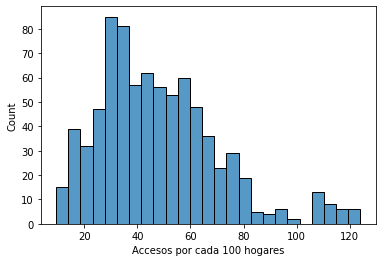

In [49]:
eda_histogramas(url_1)